### **Support Vector Machines: Classifying Handwritten Digits**

**Import the packages**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

1. **Load the Dataset**

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

2. **Data Exploration**

In [4]:
X.shape, y.shape, np.unique(y)

((1797, 64), (1797,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

3. **Data Splitting**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

4. **Build an SVM Classifier**

In [25]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cnf = confusion_matrix(y_test, y_pred)
clf = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cnf)
print("Classification Report:\n", clf)

Accuracy: 0.975
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  1  0  0  0  1  0 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy  

5. **Experiment with Kernels**

In [26]:
for kernel in ["linear", "poly", "rbf"]:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy ({kernel}):", acc)

Accuracy (linear): 0.975
Accuracy (poly): 0.9638888888888889
Accuracy (rbf): 0.9805555555555555


6. **Hyperparameter Tuning**

In [ ]:
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4]},
]

grid = GridSearchCV(model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid = grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


7. **Visualization**

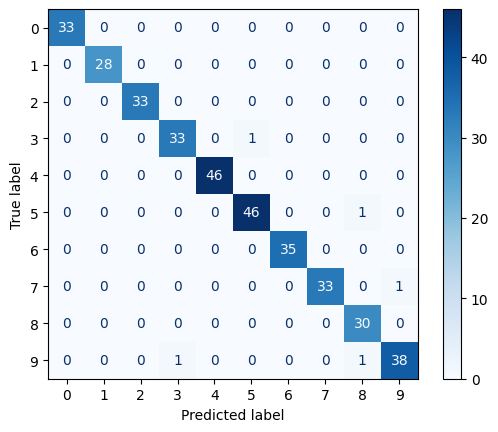

In [40]:
best_model = SVC(C=0.1, gamma=0.1, kernel="poly")
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cnf = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.show()